# JSC370 Class 7


## Today's Class Feb. 27, 2020

- Review Assignment #3
- In-class activity related to ipywidgets


# Assignment 3

- Review assignment expectations

# Github and git

[Github cheat sheet](https://education.github.com/git-cheat-sheet-education.pdf)


# ipywidgets

## What are widgets?

- Jupyter Notebook minimizes the distance of the user from their data.

- Widgets are eventful python objects that have a representation in the browser, often as a control like a slider, textbox, etc.

- For example, allow the user to move a slider that results in another value being updated.

*Ref:* [ipywidgets docs](https://ipywidgets.readthedocs.io/en/stable/index.html)

In [2]:
from ipywidgets import interact
import ipywidgets as widgets

def f(a, b):
    return print('a + b =', a + b)

interact(f, a =1, b =1);

interactive(children=(IntSlider(value=1, description='a', max=3, min=-1), IntSlider(value=1, description='b', …

- In *imperative programming* `c = a + b` sets the current value of `c` to `a+b`.
- If `a` or `b` changes `c` retains it's original value until we execute a new value assignment to `c`.
- In reactive programming, `c = a + b` is a variable definition. 
- This means that `c` is always equal to `a + b`, even if `a` or `b` changes. The runtime keeps the value of `c` up-to-date.

*Ref:* [A Better Way to Code](https://medium.com/@mbostock/a-better-way-to-code-2b1d2876a3a0)

In [3]:
a = 1
b = 1
c = a + b
print('original value of c:',c)
a = 2
print('value of c after a is changed:',c)

original value of c: 2
value of c after a is changed: 2


# Using Interact

- `interact` creates UI controls for exploring code and data interactively.


- We can pass arguments to `interact` to get a slider, dropdown, or text. 

In [4]:
import pandas as pd

df = pd.read_csv('uoft_sample_data.csv')
df.head()

,Unnamed: 0,PubDate,Source Title,UofT authors
0,7209,2017-07-01,CURRENT PSYCHIATRY REPORTS,1.0
1,11987,2017-01-01,RELIGIOUS EDUCATION,1.0
2,15940,2017-07-31,CANADIAN MEDICAL ASSOCIATION JOURNAL,4.0
3,3274,2017-09-01,PLACENTA,1.0
4,11720,2017-05-01,ACADEMIC EMERGENCY MEDICINE,1.0


In [5]:
# display first 3 rows of selected column
# using integer based selection
# integer argument generates an IntSlider widget

def mydat(colnum):
    return df.loc[:,list(df)[colnum]].head(n=3)

interact(mydat, colnum = 1);

interactive(children=(IntSlider(value=1, description='colnum', max=3, min=-1), Output()), _dom_classes=('widge…

In [6]:
# display first 3 rows of selected column
# using column name based selection
# a dropdown is generated if a list of list of tuples is given

def mydat(colname):
    return df[colname].head(3)

interact(mydat, colname = list(df));

interactive(children=(Dropdown(description='colname', options=('Unnamed: 0', 'PubDate', 'Source Title', 'UofT …

- `interactive`, `interact_manual`, `continuous_update`, and `interactive_output` all provide additional flexibility to `interact`. 

In [7]:
from ipywidgets import interact
import ipywidgets as widgets
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

def plott(mean,sd, df):
    fig, ax = plt.subplots()
    x0 = np.linspace(t.ppf(0.01, df = 1, loc = 0, scale = 1),t.ppf(0.99,df=1, loc = 0, scale = 1), 100)
    x = np.linspace(t.ppf(0.01, df = df, loc = mean, scale = sd),t.ppf(0.99, df=df, loc = mean, scale = sd), 100)
    plt.plot(x0, t.pdf(x0, df=1, loc = 0, scale =1), lw=5, alpha=0.6, label=r'$t_{1}$')
    plt.legend()
    plt.plot(x, t.pdf(x, df=df, loc = mean, scale =sd), lw=5, alpha=0.6, label=r'$t_{\nu}$')
    plt.legend()
    
    plt.axvline(x=0, color = 'red')
    plt.axvline(x=mean)
    #plt.show()


interact(plott, mean = widgets.IntSlider(value=1, min=0, max=20, step=1),
                   sd = widgets.IntSlider(value=1, min=1, max=5, step=1),
                   df = widgets.IntSlider(value=1, min=1, max=30, step=1))

widgets.HTML(
    value="<b>Drag the slider to explore different t distributions</b>",
)

interactive(children=(IntSlider(value=1, description='mean', max=20), IntSlider(value=1, description='sd', max…

HTML(value='<b>Drag the slider to explore different t distributions</b>')

# `interactive` Exercise

(a) Create an interactive scatter plot that shows the effect of mean, variance, and sample size on a fitted simple linear regression line.  Assume that the independent variable has $N(\mu,\sigma^2)$ distribution.

(b) Briefly explain why your interactive scatter plot is effective at communicating the impact of mean, variance, and sample size on simple linear regression.   

In [8]:
# code for interactive exercise

# Output widgets

> The `Output` widget can capture and display stdout, stderr and rich output generated by IPython. You can also append output directly to an output widget, or clear it programmatically.

[*Ref*](https://ipywidgets.readthedocs.io/en/stable/examples/Output%20Widget.html)

`Output` can display nested widgets in output widget.

In [9]:
out = widgets.Output()

display(out)

with out:
    display(widgets.IntSlider())

Output()

Now let's do something similar with a dropdown that displays unique values of a column in a dataframe.

In [10]:
import pandas as pd
import numpy as np

uoft2017 = pd.read_csv('uoft_sample_data.csv')
uoft2017.head(n=3)

# dropdown menu of dates
dd = widgets.Dropdown(options = uoft2017.PubDate.drop_duplicates().sort_values())

# display dropdown and dataframe
display(dd)

Dropdown(options=('2017-01-01', '2017-02-01', '2017-03-01', '2017-03-03', '2017-03-14', '2017-04-01', '2017-05…


Create an integer slider and print the value of the slider

In [11]:
int_range = widgets.IntSlider()
out2 = widgets.Output()

display(int_range)

def changeit(change):
    with out2:
        print(change['new'])

int_range.observe(changeit, names='value')

IntSlider(value=0)

# Exercise

- How can the print be displayed?

In [13]:
# code for exercise

- The `changeit` function is an example of an event handler the argument must be named `change` and `new` is one of the attributes of change.

In [204]:
print(widgets.Widget.observe.__doc__)

Setup a handler to be called when a trait changes.

        This is used to setup dynamic notifications of trait changes.

        Parameters
        ----------
        handler : callable
            A callable that is called when a trait changes. Its
            signature should be ``handler(change)``, where ``change`` is a
            dictionary. The change dictionary at least holds a 'type' key.
            * ``type``: the type of notification.
            Other keys may be passed depending on the value of 'type'. In the
            case where type is 'change', we also have the following keys:
            * ``owner`` : the HasTraits instance
            * ``old`` : the old value of the modified trait attribute
            * ``new`` : the new value of the modified trait attribute
            * ``name`` : the name of the modified trait attribute.
        names : list, str, All
            If names is All, the handler will apply to all traits.  If a list
            of str, handler wil

# Exercise

- Only print the current number.

In [14]:
# code for exercise

In [15]:
# dropdown menu of dates
dd = widgets.Dropdown(options = uoft2017.PubDate.drop_duplicates().sort_values())

# Output widget for dataframe
out2 = widgets.Output()

# display dropdown and dataframe
display(dd, out2)

# dd_eventhand is an event handler for displaying a filtered view of the dataframe
# The callback registered must have the signature handler(change) where change is a 
# dictionary holding the information about the change.
# see https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Events.html and 
# the doc string for observe (i.e., print(widgets.Widget.observe.__doc__))

def dd_eventhand(change):
    out2.clear_output() # clear current output
    with out2:
        # display three columns of dataframe filtered by date selected in dropdown
        display(uoft2017[uoft2017['PubDate'] == change.new][['PubDate','Source Title','UofT authors']].head())

dd.observe(dd_eventhand, names = 'value')

Dropdown(options=('2017-01-01', '2017-02-01', '2017-03-01', '2017-03-03', '2017-03-14', '2017-04-01', '2017-05…

Output()

# Time series

- Time series is a set of numbers, each one being recorded at a specified time. In general, time can be recorded in days, months, years, etc.



- Trend and seasonal patterns are common in time series data. A trend exists when there is a long-term increase or decrease in the data. A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week.

# Download Trends for JAMA

In [15]:
!ls -l ./data/JSC370\ Data\ KM/JAMA*

-rw-r--r--@ 1 nathantaback  staff  13734  6 Jul  2017 ./data/JSC370 Data KM/JAMA JR1 2014.xlsx
-rw-r--r--@ 1 nathantaback  staff  13928  7 Jul  2017 ./data/JSC370 Data KM/JAMA JR1 2015.xlsx
-rw-r--r--@ 1 nathantaback  staff  14042  7 Jul  2017 ./data/JSC370 Data KM/JAMA JR1 2016.xlsx
-rw-r--r--@ 1 nathantaback  staff  14188 15 Feb  2018 ./data/JSC370 Data KM/JAMA JR1 2017.xlsx
-rw-r--r--@ 1 nathantaback  staff  15541 26 Aug  2019 ./data/JSC370 Data KM/JAMA JR1 2018.xlsx


In [3]:
import glob
import pandas as pd
# get list of file names
fnames = glob.glob('./data/JSC370 Data KM/JAMA*')
fnames[0]
df = pd.read_excel(fnames[0], usecols='A,K:V', header=7)
df.head()

,Journal,Jan-2016,Feb-2016,Mar-2016,Apr-2016,May-2016,Jun-2016,Jul-2016,Aug-2016,Sep-2016,Oct-2016,Nov-2016,Dec-2016
0,Total for all journals,13875,15881,16476,11757,10133,8948,9788,9570,11077,13989,15998,9006
1,Total for all journals,12,4,1,0,1,3,1,0,1,20,2,8
2,Archives of Neurology & Psychiatry,203,19,16,13,3,7,4,16,15,7,34,18
3,Archives of Neurology & Psychiatry,0,0,0,0,0,0,0,0,0,0,0,0
4,JAMA,8248,8729,9314,6647,5643,4280,5419,5182,5708,7929,8747,4486


In [208]:
# read excel files in a list of dfs
jama = []
for f in fnames:
    df = pd.read_excel(f, usecols='A,K:V', header=7)
    jama.append(df)

# concatenate on columns
jama1 = pd.concat(jama, ignore_index=False, axis = 1, sort=False)

# select columns for each month/year 
import numpy as np
a = np.arange(13)
b = np.arange(14,26)
c = np.arange(27,39)
d = np.arange(40,52) # 2018 - exclude
e = np.arange(53,65)
f = np.concatenate((a,b,c,e))
w = list(f)



jama2 = jama1.iloc[:,w]

In [5]:
# gather all rows with JAMA
# convert to datetime then sort

jama3 = jama2[jama2['Journal']=='JAMA'].groupby('Journal').sum().transpose()
jama3.index = pd.to_datetime(jama3.index, format = '%b-%Y')
jama3.sort_index(inplace=True)

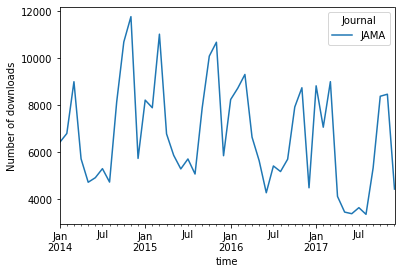

In [209]:
import matplotlib.pyplot as plt

jama3.plot(); 
plt.xlabel('time');
plt.ylabel('Number of downloads');

# Basic Time Series Decomposition

Assume that the number of downloads can be decomposed as:

$$y_t=S_t+T_t+R_t,$$

$y_t$ - the number of downloads at time $t$

$S_t$ - the seasonal component at time $t$

$T_t$ - the trend component at time $t$

$R_t$ - the remainder component at time $t$

If the seasonal component is removed from the original data the resulting values are **"seasonally adjusted".**

# Moving Averages

A moving average of order $m$ is:

$$\hat T_t = \frac{1}{m}\sum_{j=-k}^k y_{t+j}.$$

This is often called a an $m$-MA - a moving average of order $m$.

If $m$ is odd then the MA is symmetric.  Simple MA is usually of odd order $m=2k+1$, the middle observation, and $k$ observations on either side are averaged.  

## Moving averages of moving averages

- It's possible to compute a moving average of moving averages.  

- This can make an even order moving average symmetric.  For example, if a 4-MA is followed by a 2-MA then it is sometimes called a centered moving average of order 4. 

- The notation $2 \times 4$-MA is used for these moving averages.

# Classical Decomposition


*Step 1:*

If $m$ is odd compute the trend-cycle component $\hat T_t$ using an $m$-MA.

If $m$ is even compute the trend-cycle component using a $2 \times m$-MA.


*Step 2:*

Calculate the detrended series: $y_t-\hat{T}_t$

*Step 3:*

To estimate the seasonal component for each season, average the detrended values for that season. 

For example, with monthly data, the seasonal component for March is the average of all the detrended March values in the data. These seasonal component values are then adjusted to ensure that they add to zero. The seasonal component is obtained by stringing together these monthly values, and then replicating the sequence for each year of data. This gives $\hat S_t$.

*Step 4:*

The remainder component is calculated by subtracting the estimated seasonal and trend-cycle components: $\hat R_t= y_t-\hat T_t-\hat S_t$.

In [153]:
# observed counts
print('Raw data:\n',jama3.head(n=6),'\n')

# 7-MA raw calc 
# or res.observed[0:7].mean() - close to raw
print((jama3['JAMA'][0]+jama3['JAMA'][1]+jama3['JAMA'][2]+jama3['JAMA'][3]+
       jama3['JAMA'][4]+jama3['JAMA'][5]+jama3['JAMA'][6])/7)

# same as above, but use pandas rolling method
jama3.rolling(7).mean()[0:8]

Raw data:
 Journal       JAMA
2014-01-01  6421.0
2014-02-01  6802.0
2014-03-01  9005.0
2014-04-01  5724.0
2014-05-01  4727.0
2014-06-01  4920.0 

6129.142857142857


Journal,JAMA
2014-01-01,NaN
2014-02-01,NaN
2014-03-01,NaN
2014-04-01,NaN
2014-05-01,NaN
2014-06-01,NaN
2014-07-01,6129.142857
2014-08-01,5888.142857


# `seasonal_decompose` in `statsmodels`


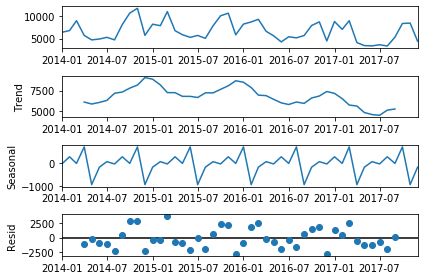

In [174]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(jama3, period=7)
res.plot()
plt.show();

Is seasonal adjustment informative?

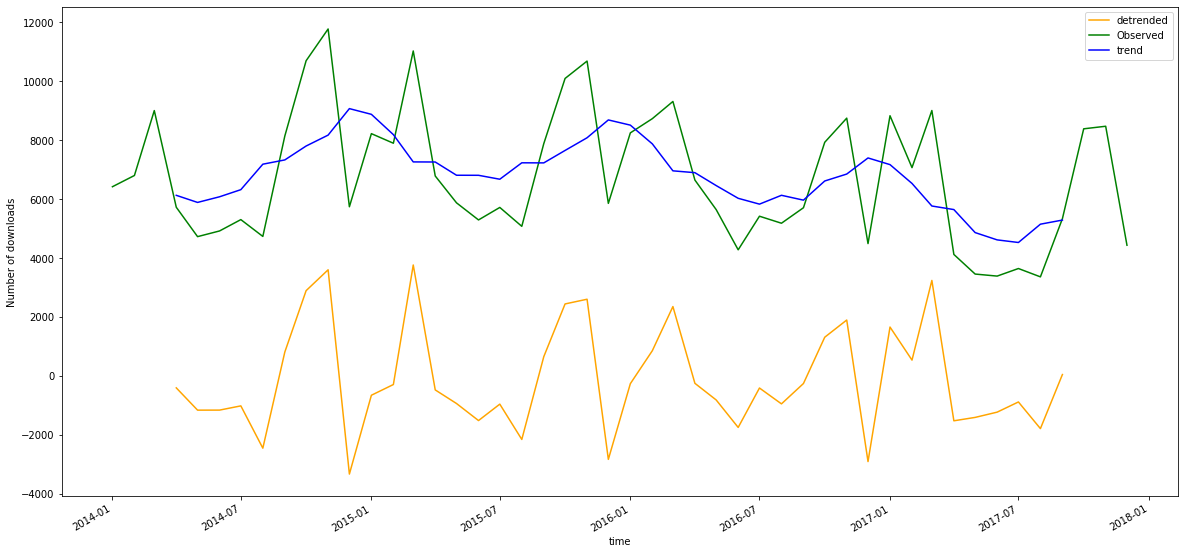

In [169]:
plt.figure(figsize=(20,10))
detrend = res.observed - res.trend
plt.plot(jama3.index, detrend, color = 'orange', label = 'detrended')
res.observed.plot(color = 'green', label = 'Observed')
res.trend.plot(color = 'blue')
plt.legend()
plt.xlabel('time');
plt.ylabel('Number of downloads');

# Exponential Smoothing

The naive method: all forecasts for the future are equal to the last observed value of the series.

$$\hat y_{T+h|T} = y_T, h = 1,2,\ldots$$

The average method: all future forecasts are equal to a simple average of the observed data.

$$\hat y_{T+h|T} = \frac{1}{T}\sum_{t=1}^Ty_t, h = 1,2,\ldots.$$

Exponential smoothing: attach larger weights to more recent observations than to observations in distant past.

$$\hat y_{T+1|T} = \alpha y_T + \alpha(1-\alpha)y_{T-1} + \alpha(1-\alpha)^2y_{T-2} + \cdots,$$
$\alpha \in [0,1]$ is the smoothing parameter.



# Holt-Winters' seasonal method

`statsmodels.tsa.holtwinters.ExponentialSmoothing` implements Holt-Winters' seasonal method of forecasting that accounts for level (smoothed value of series at a time point), trend, and season.

In [190]:
import warnings
warnings.filterwarnings('ignore')

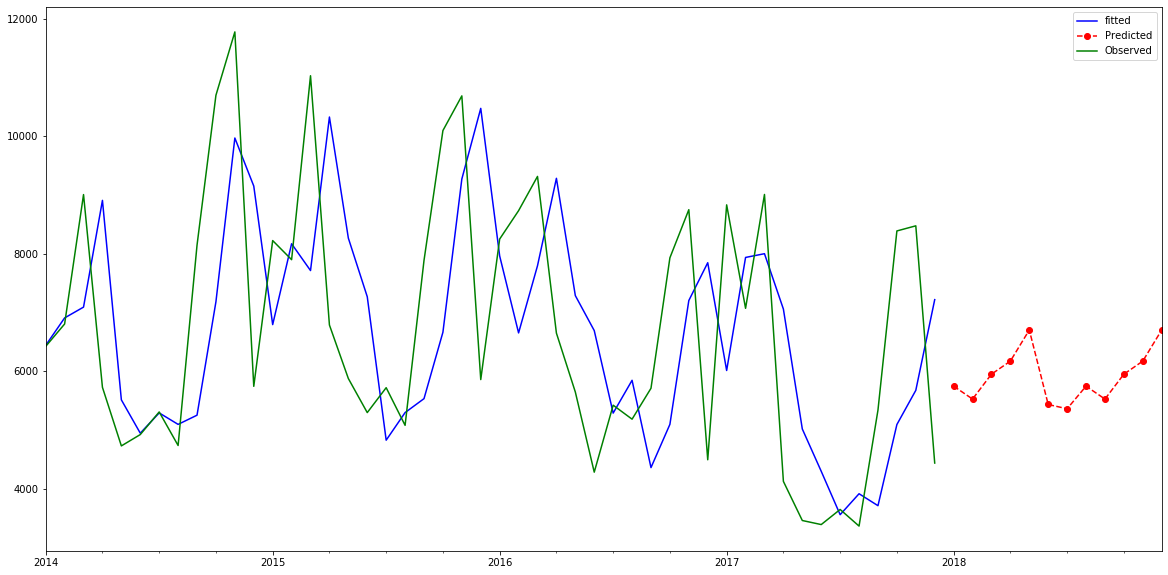

In [210]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

plt.figure(figsize=(20,10))
fit1 = ExponentialSmoothing(jama3, seasonal_periods=7, trend='add', seasonal='add').fit(use_boxcox=True)
fit1.fittedvalues.plot(style='-',color='blue', label='fitted')
fit1.forecast(12).plot(style='--', marker='o', color='red', label='Predicted')
res.observed.plot(color = 'green', label = 'Observed')
plt.legend();